In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data=pd.read_csv('train_set.csv')
test_data=pd.read_csv('test_set.csv')
val_data=pd.read_csv('validation_set.csv')

In [3]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
train_data.iloc[0]

home_team_name                                   Sunderland
away_team_name                            Tottenham Hotspur
timestamp                                        1186832700
date_GMT                              Aug 11 2007 - 11:45am
Pre-Match PPG (Home)                                    0.0
                                              ...          
penalty_misses_away                                       2
goals_involved_per_90_overall_away                     3.14
assists_per_90_overall_away                             0.0
goals_per_90_overall_away                              3.14
goals_per_90_home_away                                 4.65
Name: 0, Length: 70, dtype: object

In [5]:
train_data.columns

Index(['home_team_name', 'away_team_name', 'timestamp', 'date_GMT',
       'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg',
       'Home Team Pre-Match xG', 'Away Team Pre-Match xG', 'team_a_xg',
       'team_b_xg', 'average_goals_per_match_pre_match',
       'btts_percentage_pre_match', 'odds_ft_home_team_win', 'odds_ft_draw',
       'odds_ft_away_team_win', 'odds_btts_yes', 'odds_btts_no',
       'stadium_name', 'Season', 'home_team_shots_on_target',
       'away_team_shots_on_target', 'home_team_shots_off_target',
       'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls',
       'home_team_possession', 'away_team_possession', 'home_team_goal_count',
       'away_team_goal_count', 'winner', 'age_home',
       'minutes_played_overall_home', 'minutes_played_home_home',
       'minutes_played_away_home', 'appearances_overall_home',
       'appearances_home_home', 'appearances_away_home', 'goals_overall_home',
       'goals_home_home', 'goals_away_h

In [6]:
train_data.shape

(25059, 70)

In [7]:
test_data.shape

(3071, 70)

In [8]:
val_data.shape

(1865, 70)

In [9]:
columns_to_process = ['Pre-Match PPG (Home)', 'Pre-Match PPG (Away)',
       'Home Team Pre-Match xG', 'Away Team Pre-Match xG', 'team_a_xg','team_b_xg']

train_data[columns_to_process] = train_data[columns_to_process].replace(0,np.nan)

train_data[columns_to_process] = train_data[columns_to_process].apply(lambda col: col.fillna(col.median()))

In [10]:
cols_to_drop = ['timestamp', 'date_GMT','Season','home_team_goal_count','away_team_goal_count']

# Drop the specified columns
test_data = test_data.drop(columns=cols_to_drop)
train_data = train_data.drop(columns=cols_to_drop)
val_data = val_data.drop(columns=cols_to_drop)

In [11]:
train_data.head(4)

,home_team_name,away_team_name,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,Home Team Pre-Match xG,Away Team Pre-Match xG,team_a_xg,team_b_xg,...,goals_away_away,assists_overall_away,assists_home_away,assists_away_away,penalty_goals_away,penalty_misses_away,goals_involved_per_90_overall_away,assists_per_90_overall_away,goals_per_90_overall_away,goals_per_90_home_away
0,Sunderland,Tottenham Hotspur,1.75,1.31,1.58,0.89,1.67,1.41,1.6,1.35,...,19,0,0,0,4,2,3.14,0.0,3.14,4.65
1,West Ham United,Tottenham Hotspur,1.33,0.57,1.47,0.89,1.67,1.41,1.6,1.35,...,19,0,0,0,4,2,3.14,0.0,3.14,4.65
2,Middlesbrough,Tottenham Hotspur,1.00,0.50,1.37,0.89,1.67,1.41,1.6,1.35,...,19,0,0,0,4,2,3.14,0.0,3.14,4.65
3,Everton,Tottenham Hotspur,2.00,0.67,1.95,0.89,1.67,1.41,1.6,1.35,...,19,0,0,0,4,2,3.14,0.0,3.14,4.65


In [12]:
train_data.isnull().sum()

home_team_name                        0
away_team_name                        0
Pre-Match PPG (Home)                  0
Pre-Match PPG (Away)                  0
home_ppg                              0
                                     ..
penalty_misses_away                   0
goals_involved_per_90_overall_away    0
assists_per_90_overall_away           0
goals_per_90_overall_away             0
goals_per_90_home_away                0
Length: 65, dtype: int64

In [13]:
#now this data contains --> team experience { player info + oddds data + pre match info}

In [14]:
train_data[train_data['home_team_name']=='West Ham United']

,home_team_name,away_team_name,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,Home Team Pre-Match xG,Away Team Pre-Match xG,team_a_xg,team_b_xg,...,goals_away_away,assists_overall_away,assists_home_away,assists_away_away,penalty_goals_away,penalty_misses_away,goals_involved_per_90_overall_away,assists_per_90_overall_away,goals_per_90_overall_away,goals_per_90_home_away
1,West Ham United,Tottenham Hotspur,1.33,0.57,1.47,0.89,1.67,1.41,1.60,1.35,...,19,0,0,0,4,2,3.14,0.00,3.14,4.65
15,West Ham United,Liverpool,1.45,2.00,1.47,1.79,1.67,1.41,1.60,1.35,...,22,1,1,0,5,0,3.37,0.08,3.29,3.99
29,West Ham United,Reading,1.13,0.25,1.47,0.53,1.67,1.41,1.60,1.35,...,22,0,0,0,2,0,1.81,0.00,1.81,1.66
43,West Ham United,Fulham,1.30,0.40,1.47,0.84,1.67,1.41,1.60,1.35,...,15,0,0,0,2,1,2.65,0.00,2.65,3.07
57,West Ham United,Newcastle United,1.53,0.76,1.47,0.74,1.67,1.41,1.60,1.35,...,19,0,0,0,4,0,1.98,0.00,1.98,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7317,West Ham United,Southampton,1.75,0.67,1.68,0.79,1.70,1.37,1.74,1.62,...,20,26,15,11,4,0,3.14,1.26,1.91,2.19
7330,West Ham United,Crystal Palace,3.00,1.31,1.68,1.00,2.40,0.52,1.63,1.18,...,23,31,15,16,6,2,4.38,1.76,2.62,2.84
7343,West Ham United,Leicester City,1.75,1.31,1.68,0.95,1.67,1.41,2.40,0.68,...,28,45,24,21,2,0,6.32,2.88,3.48,4.33
7361,West Ham United,Brighton & Hove Albion,1.67,1.50,1.68,1.53,1.72,1.25,1.88,1.28,...,22,30,11,19,4,3,3.52,1.66,1.89,1.76


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 65 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   home_team_name                      25059 non-null  object 
 1   away_team_name                      25059 non-null  object 
 2   Pre-Match PPG (Home)                25059 non-null  float64
 3   Pre-Match PPG (Away)                25059 non-null  float64
 4   home_ppg                            25059 non-null  float64
 5   away_ppg                            25059 non-null  float64
 6   Home Team Pre-Match xG              25059 non-null  float64
 7   Away Team Pre-Match xG              25059 non-null  float64
 8   team_a_xg                           25059 non-null  float64
 9   team_b_xg                           25059 non-null  float64
 10  average_goals_per_match_pre_match   25059 non-null  float64
 11  btts_percentage_pre_match           25059

In [16]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Assuming your train_data, val_data, and test_data are already loaded DataFrames

# Define the target column and features
target = 'winner'
features = train_data.columns.drop([target])

# Convert appropriate columns to 'category' dtype for CatBoost
categorical_features = ['home_team_name', 'away_team_name', 'stadium_name']

train_data[categorical_features] = train_data[categorical_features].astype('category')

# Prepare data by removing unseen labels in validation and test sets
for col in categorical_features:
    train_data[col] = train_data[col].astype('category')
    val_data[col] = val_data[col].astype('category')
    test_data[col] = test_data[col].astype('category')

    unseen_labels_val = set(val_data[col].cat.categories) - set(train_data[col].cat.categories)
    unseen_labels_test = set(test_data[col].cat.categories) - set(train_data[col].cat.categories)

    if unseen_labels_val:
        print(f"Unseen labels in validation set for column '{col}': {unseen_labels_val}")
        val_data = val_data[~val_data[col].isin(unseen_labels_val)]

    if unseen_labels_test:
        print(f"Unseen labels in test set for column '{col}': {unseen_labels_test}")
        test_data = test_data[~test_data[col].isin(unseen_labels_test)]

# Ensure that we have non-empty validation and test sets after removing unseen labels
if val_data.empty or test_data.empty:
    raise ValueError("Validation or test set is empty after removing rows with unseen labels. Please check the data.")

# Encode target variable
target_encoder = LabelEncoder()
train_data[target] = target_encoder.fit_transform(train_data[target])
val_data[target] = target_encoder.transform(val_data[target])
test_data[target] = target_encoder.transform(test_data[target])

# Create Pool objects for CatBoost
train_pool = Pool(train_data[features], train_data[target], cat_features=categorical_features)
val_pool = Pool(val_data[features], val_data[target], cat_features=categorical_features)
test_pool = Pool(test_data[features], test_data[target], cat_features=categorical_features)

# Train CatBoost model
model = CatBoostClassifier(
    iterations=2000,
    learning_rate=0.05,
    depth=4,
    l2_leaf_reg=3.0,
    rsm=0.8,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    random_seed=42,
    bagging_temperature=1.0,
    od_type='Iter',
    od_wait=200,
    verbose=100
)

model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=500)


Unseen labels in validation set for column 'home_team_name': {'Nottingham Forest', 'Ballkani', 'Apollon', 'AEK Larnaca', 'Cremonese', 'Shkupi', 'Dinamo Batumi', 'Eintracht Frankfurt', 'Monza', 'Rīgas FS', 'Union Saint-Gilloise', 'Víkingur Reykjavík'}
Unseen labels in test set for column 'home_team_name': {'Luton Town', 'Häcken', 'Union Berlin', 'Valmiera / BSS', 'Monza', 'SSC Farul', 'Royal Antwerp FC', 'Struga', 'Cremonese', 'Dnipro-1', 'Bačka Topola', 'Larne', 'Servette', 'Hamrun Spartans', 'Eintracht Frankfurt', 'Lens', 'Swift Hesperange', 'Nottingham Forest', 'Ballkani', 'Raków Częstochowa', 'Aris', "Atlètic Club d'Escaldes"}
Unseen labels in validation set for column 'away_team_name': {'Nottingham Forest', 'Ballkani', 'Apollon', 'AEK Larnaca', 'Cremonese', 'Shkupi', 'Dinamo Batumi', 'Eintracht Frankfurt', 'Monza', 'Rīgas FS', 'Union Saint-Gilloise', 'Víkingur Reykjavík'}
Unseen labels in test set for column 'away_team_name': {'Luton Town', 'Häcken', 'Union Berlin', 'Valmiera / BSS

Model: CatBoost
Accuracy: 0.6543362104397863
Classification Report:
              precision    recall  f1-score   support

        away       0.65      0.73      0.69       728
        draw       0.40      0.14      0.20       584
        home       0.69      0.87      0.77      1121

    accuracy                           0.65      2433
   macro avg       0.58      0.58      0.56      2433
weighted avg       0.61      0.65      0.61      2433



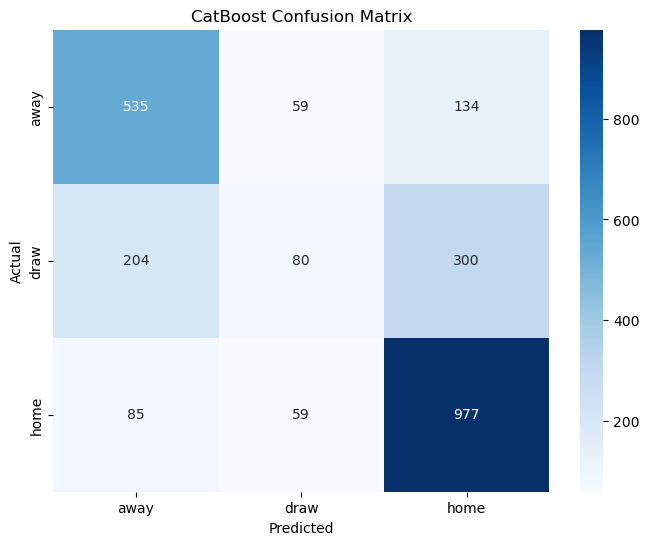

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title("CatBoost Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Predict on the test set
y_pred = model.predict(test_pool)

# Evaluate the model
accuracy = accuracy_score(test_data[target], y_pred)
report = classification_report(test_data[target], y_pred,target_names=target_encoder.classes_)

print("Model: CatBoost")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
cm = confusion_matrix(test_data[target], y_pred)
plot_confusion_matrix(cm, target_encoder.classes_)

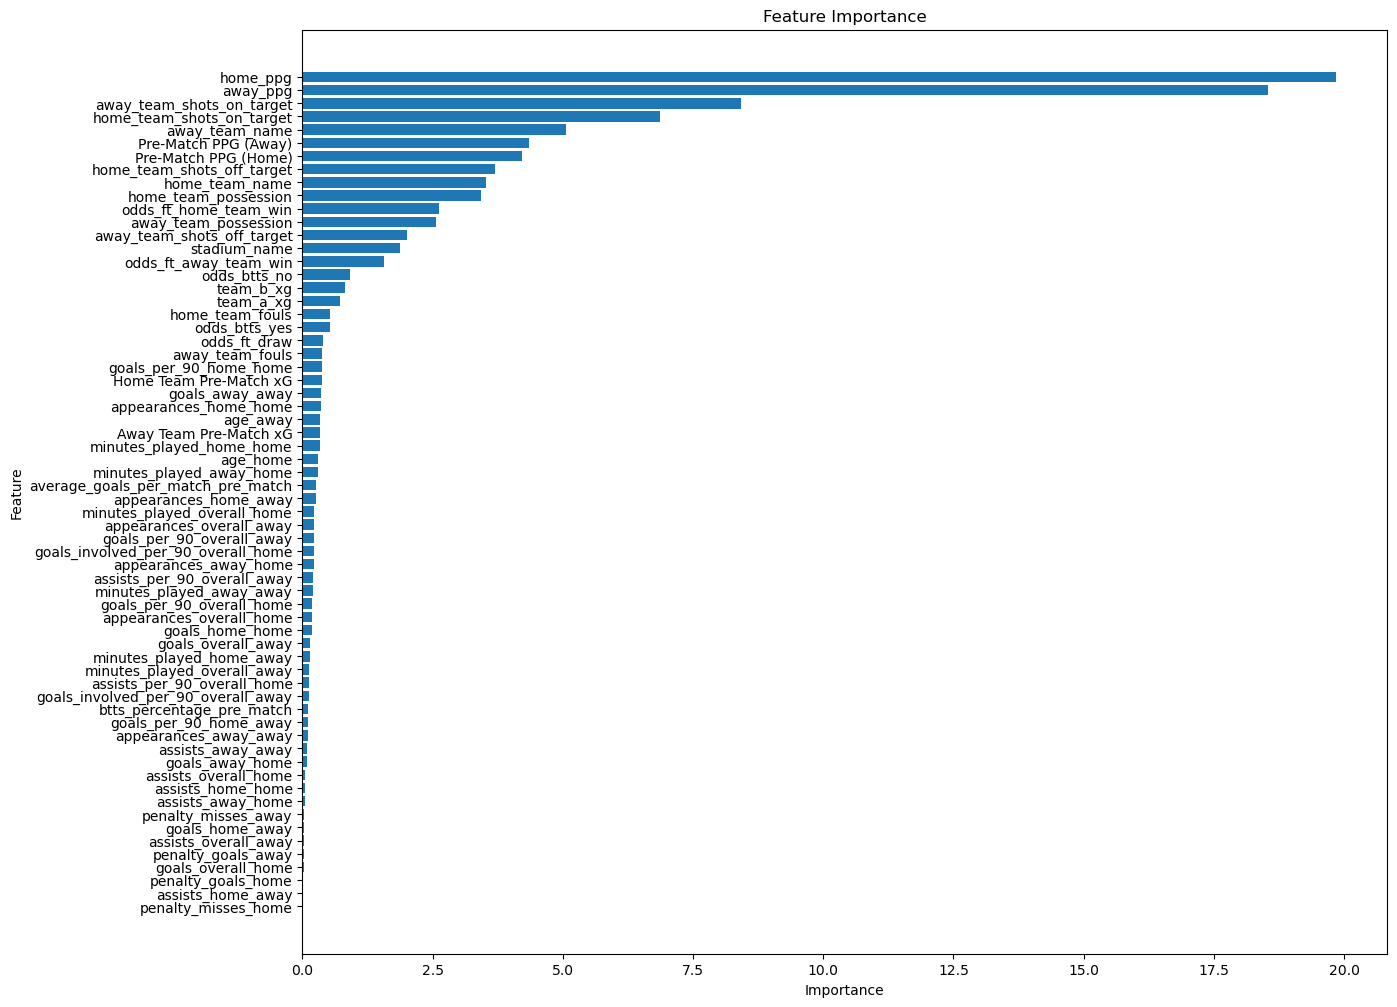

In [18]:
import matplotlib.pyplot as plt
feature_importances = model.get_feature_importance(train_pool)
feature_names = train_data[features].columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(14, 12))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [19]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report


In [21]:
train_data=pd.read_csv('train_set.csv')
test_data=pd.read_csv('test_set.csv')
val_data=pd.read_csv('validation_set.csv')


cols_to_drop = ['timestamp', 'date_GMT','Season','home_team_goal_count','away_team_goal_count']

# Drop the specified columns
test_data = test_data.drop(columns=cols_to_drop)
train_data=train_data.drop(columns=cols_to_drop)
val_data=val_data.drop(columns=cols_to_drop)



In [22]:
#train_data, val_data, and test_data are already loaded DataFrames

# Define the target column and features
target = 'winner'
features = train_data.columns.drop([target])

# Convert appropriate columns to 'category' dtype for CatBoost
categorical_features = ['home_team_name', 'away_team_name', 'stadium_name']

# Ensure the categorical features are of category dtype
train_data[categorical_features] = train_data[categorical_features].astype('category')
val_data[categorical_features] = val_data[categorical_features].astype('category')
test_data[categorical_features] = test_data[categorical_features].astype('category')

# Prepare data for other models by label encoding categorical columns and target variable
label_encoders = {col: LabelEncoder().fit(train_data[col]) for col in categorical_features}
target_encoder = LabelEncoder().fit(train_data[target])

for col, le in label_encoders.items():
    train_data[col] = le.transform(train_data[col])
    # Transform validation and test data, handle unseen labels
    unseen_labels_val = set(val_data[col].unique()) - set(le.classes_)
    unseen_labels_test = set(test_data[col].unique()) - set(le.classes_)

    if unseen_labels_val:
        print(f"Unseen labels in validation set for column '{col}': {unseen_labels_val}")
        val_data = val_data[~val_data[col].isin(unseen_labels_val)]

    if unseen_labels_test:
        print(f"Unseen labels in test set for column '{col}': {unseen_labels_test}")
        test_data = test_data[~test_data[col].isin(unseen_labels_test)]

    le.classes_ = np.append(le.classes_, list(unseen_labels_val))
    le.classes_ = np.append(le.classes_, list(unseen_labels_test))
    val_data[col] = le.transform(val_data[col])
    test_data[col] = le.transform(test_data[col])
    
train_data[target] = target_encoder.transform(train_data[target])
val_data[target] = target_encoder.transform(val_data[target])
test_data[target] = target_encoder.transform(test_data[target])

Unseen labels in validation set for column 'home_team_name': {'Nottingham Forest', 'Ballkani', 'Apollon', 'AEK Larnaca', 'Cremonese', 'Shkupi', 'Dinamo Batumi', 'Eintracht Frankfurt', 'Monza', 'Rīgas FS', 'Union Saint-Gilloise', 'Víkingur Reykjavík'}
Unseen labels in test set for column 'home_team_name': {'Luton Town', 'Häcken', 'Union Berlin', 'Valmiera / BSS', 'Monza', 'SSC Farul', 'Royal Antwerp FC', 'Struga', 'Cremonese', 'Dnipro-1', 'Bačka Topola', 'Larne', 'Servette', 'Hamrun Spartans', 'Eintracht Frankfurt', 'Lens', 'Swift Hesperange', 'Nottingham Forest', 'Ballkani', 'Raków Częstochowa', 'Aris', "Atlètic Club d'Escaldes"}
Unseen labels in validation set for column 'away_team_name': {'Nottingham Forest', 'Ballkani', 'Apollon', 'AEK Larnaca', 'Cremonese', 'Shkupi', 'Dinamo Batumi', 'Eintracht Frankfurt', 'Monza', 'Rīgas FS', 'Union Saint-Gilloise', 'Víkingur Reykjavík'}
Unseen labels in test set for column 'away_team_name': {'Luton Town', 'Häcken', 'Union Berlin', 'Valmiera / BSS

In [23]:
# Train RandomForest model
rf_model = RandomForestClassifier(
    n_estimators=200,           # Number of trees
    max_depth=6,               # Maximum depth of the tree
    min_samples_split=5,        # Minimum number of samples required to split an internal node
    min_samples_leaf=2,         # Minimum number of samples required to be at a leaf node
    random_state=42
)
rf_model.fit(train_data[features], train_data[target])

# Train XGBoost model with additional hyperparameters
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=200,          # Number of boosting rounds
    learning_rate=0.1,         # Learning rate
    max_depth=6,              # Maximum depth of the tree
    subsample=0.8,             # Subsample ratio of the training instances
    colsample_bytree=0.8,      # Subsample ratio of columns when constructing each tree
    random_state=42
)
xgb_model.fit(train_data[features], train_data[target])

# Train LightGBM model with additional hyperparameters
lgbm_model = LGBMClassifier(
    n_estimators=200,          # Number of boosting rounds
    learning_rate=0.1,         # Learning rate
    max_depth=10,              # Maximum depth of the tree
    num_leaves=6,             # Maximum tree leaves for base learners
    subsample=0.8,             # Subsample ratio of the training instances
    colsample_bytree=0.8,      # Subsample ratio of columns when constructing each tree
    random_state=42
)
lgbm_model.fit(train_data[features], train_data[target])


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9767
[LightGBM] [Info] Number of data points in the train set: 25059, number of used features: 64
[LightGBM] [Info] Start training from score -1.208599
[LightGBM] [Info] Start training from score -1.443911
[LightGBM] [Info] Start training from score -0.764897


LGBMClassifier(colsample_bytree=0.8, max_depth=10, n_estimators=200,
               num_leaves=6, random_state=42, subsample=0.8)

Model: Random Forest
Accuracy: 0.6021372790793259
Classification Report:
              precision    recall  f1-score   support

        away       0.59      0.65      0.62       728
        draw       0.00      0.00      0.00       584
        home       0.61      0.88      0.72      1121

    accuracy                           0.60      2433
   macro avg       0.40      0.51      0.45      2433
weighted avg       0.46      0.60      0.52      2433





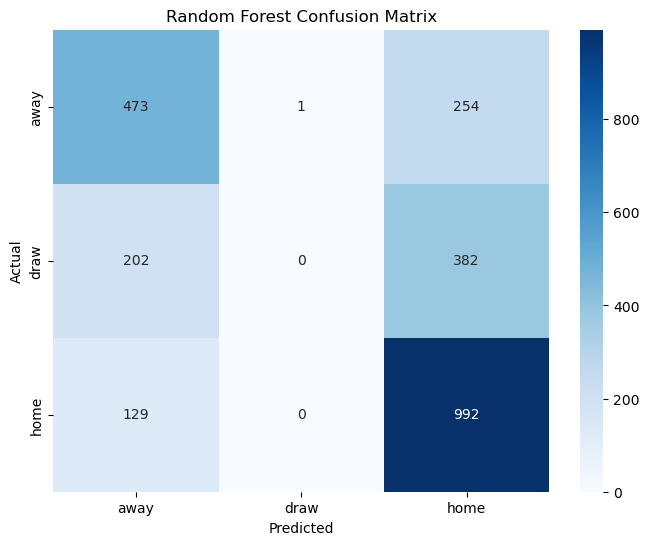

Model: XGBoost
Accuracy: 0.6617344841759145
Classification Report:
              precision    recall  f1-score   support

        away       0.66      0.70      0.68       728
        draw       0.41      0.19      0.26       584
        home       0.71      0.88      0.79      1121

    accuracy                           0.66      2433
   macro avg       0.59      0.59      0.58      2433
weighted avg       0.62      0.66      0.63      2433





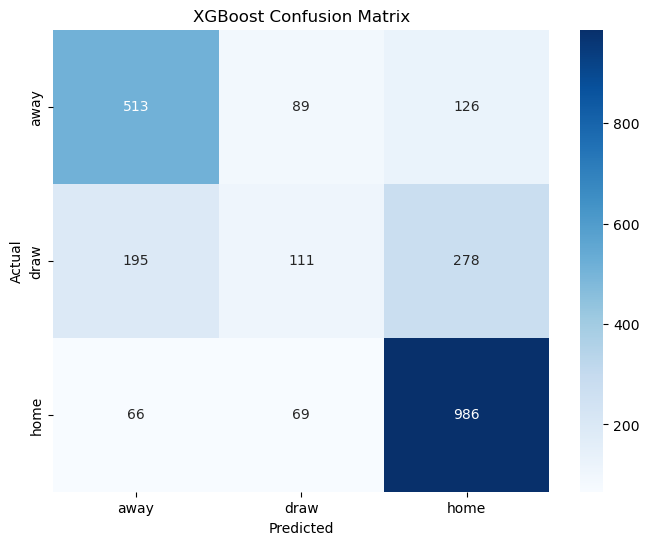

Model: LightGBM
Accuracy: 0.66872174270448
Classification Report:
              precision    recall  f1-score   support

        away       0.67      0.73      0.70       728
        draw       0.42      0.16      0.24       584
        home       0.71      0.89      0.79      1121

    accuracy                           0.67      2433
   macro avg       0.60      0.60      0.57      2433
weighted avg       0.63      0.67      0.63      2433





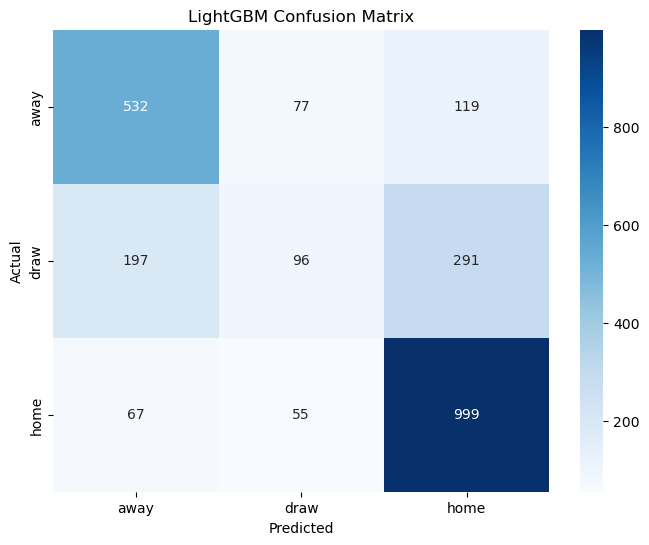

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
models = {
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "LightGBM": lgbm_model
}

# Evaluate models and plot confusion matrix
for name, model in models.items():
    y_pred = model.predict(test_data[features])

    accuracy = accuracy_score(test_data[target], y_pred)
    report = classification_report(test_data[target], y_pred, target_names=target_encoder.classes_)
    cm = confusion_matrix(test_data[target], y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    print("\n" + "="*60 + "\n")

    plot_confusion_matrix(cm, name, target_encoder.classes_)


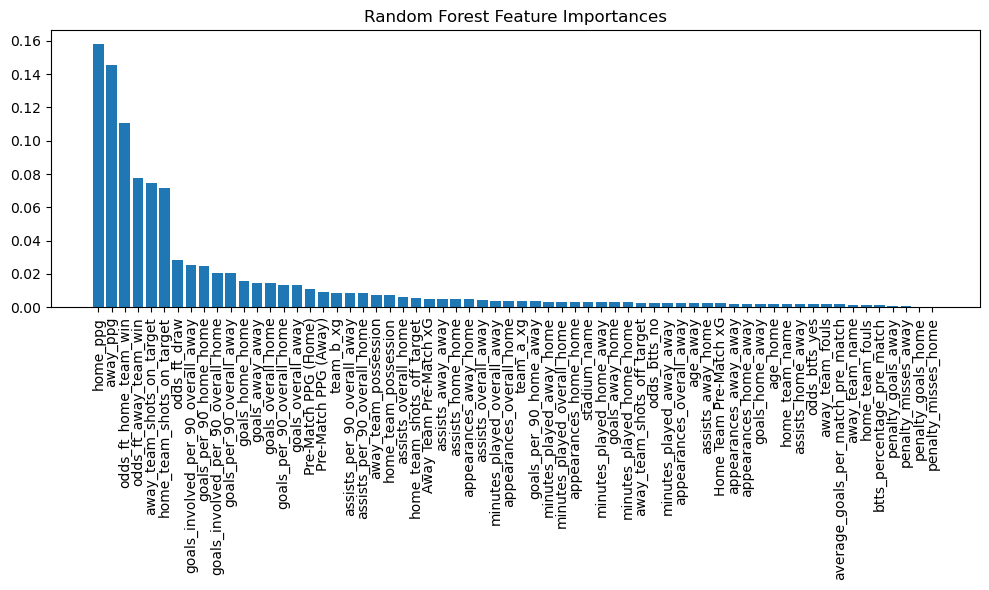

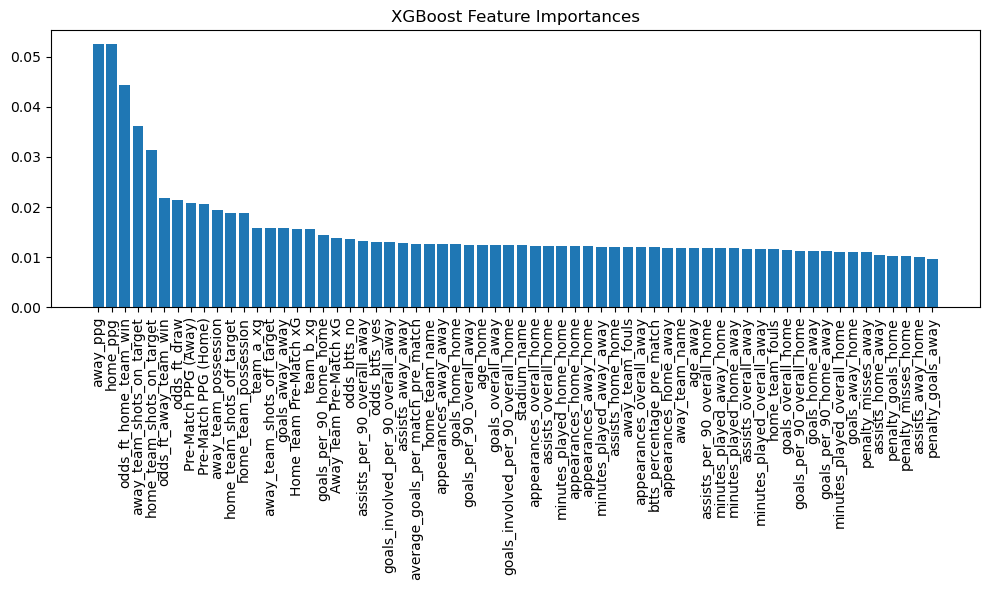

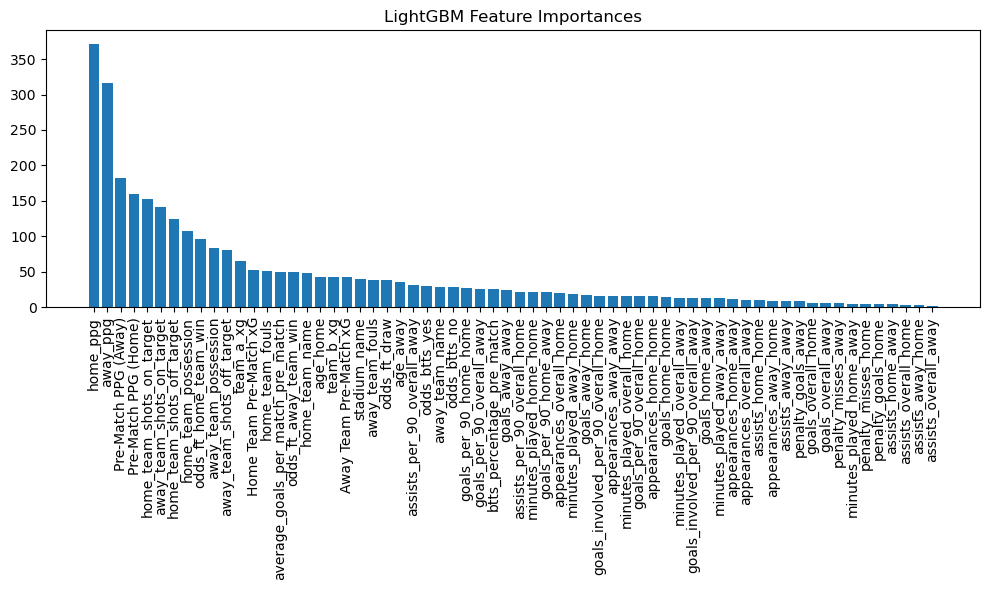

In [25]:
def plot_feature_importances(model, features, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title(f"{model_name} Feature Importances")
    plt.bar(range(len(features)), importances[indices], align="center")
    plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Random Forest feature importances
plot_feature_importances(rf_model, features, "Random Forest")

# XGBoost feature importances
plot_feature_importances(xgb_model, features, "XGBoost")

# LightGBM feature importances
plot_feature_importances(lgbm_model, features, "LightGBM")